In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.datasets import load_boston
import sklearn.preprocessing as sp
import statsmodels.stats.outliers_influence as smof
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


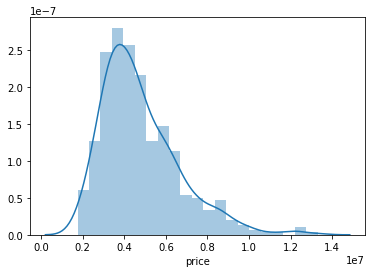

In [5]:
sns.distplot(df.price)
plt.show()

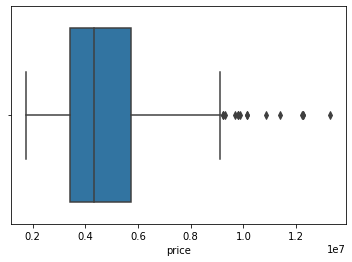

In [6]:
sns.boxplot(df.price)
plt.show()

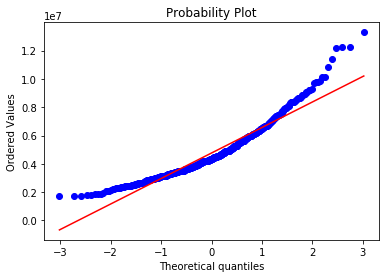

In [7]:
stats.probplot(df.price, plot = plt)
plt.show()

In [8]:
#Price has outliers on the higher side skewing the data towards right. Hence we will transform the price using log
df['price_log'] = np.log(df.price)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_log
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,16.403275
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,16.321036
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,16.321036
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,16.318175
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,16.250001


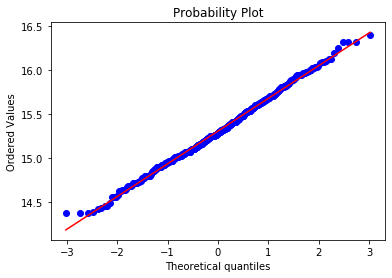

In [9]:
stats.probplot(df.price_log, plot = plt)
plt.show()

In [10]:
cat_cols = list(df.select_dtypes(include= 'object'))
cat_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [11]:
for col in cat_cols:
    print(col)
    print(df[col].value_counts())
    print()

mainroad
yes    468
no      77
Name: mainroad, dtype: int64

guestroom
no     448
yes     97
Name: guestroom, dtype: int64

basement
no     354
yes    191
Name: basement, dtype: int64

hotwaterheating
no     520
yes     25
Name: hotwaterheating, dtype: int64

airconditioning
no     373
yes    172
Name: airconditioning, dtype: int64

prefarea
no     417
yes    128
Name: prefarea, dtype: int64

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64



In [12]:
df = pd.get_dummies(df, columns = cat_cols, drop_first = True)
df.head()



,price,area,bedrooms,bathrooms,stories,parking,price_log,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,16.403275,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,16.321036,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,16.321036,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,16.318175,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,16.250001,1,1,1,0,1,0,0,0


# Build a statistical Model

In [13]:
y = df.price_log
x = df.drop(['price', 'price_log'], axis = 1)
xc = sm.add_constant(x)

model = sm.OLS(y, xc).fit()
model.summary()

C:\Users\Shweta  Sharma\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     94.84
Date:                Thu, 16 Jan 2020   Prob (F-statistic):          4.20e-129
Time:                        14:49:37   Log-Likelihood:                 93.010
No. Observations:                 545   AIC:                            -158.0
Df Residuals:                     531   BIC:                            -97.81
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              14.3524      0.051    280.577      0.000      14.252      14.453
area                             4.949e-05    4.7e-06     10.528      0.000    4.03e-05    5.87e-05
bedrooms                            0.0295      0.014      2.098      0.036       0.002       0.057
bathrooms                           0.1632      0.020      8.159      0.000       0.124       0.203
stories                             0.0901      0.012      7.258      0.000       0.066       0.115
parking                             0.0448      0.011      3.953      0.000       0.023       0.067
mainroad_yes                        0.1175      0.028      4.268      0.000       0.063       0.172
guestroom_yes                       0.0698      0.025      2.738      0.006       0.020       0.120
basement_yes                        0.0893      0.021      4.185      0.000       0.047       0.131
hotwaterheating_yes                 0.1634      0.043      3.784      0.000       0.079       0.248
airconditioning_yes                 0.1748      0.021      8.336      0.000       0.134       0.216
prefarea_yes                        0.1268      0.022      5.661      0.000       0.083       0.171
furnishingstatus_semi-furnished     0.0180      0.023      0.796      0.426      -0.026       0.062
furnishingstatus_unfurnished       -0.1099      0.024     -4.500      0.000      -0.158      -0.062
==============================================================================
Omnibus:                        3.203   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                3.363
Skew:                          -0.082   Prob(JB):                        0.186
Kurtosis:                       3.348   Cond. No.                     3.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multicollinearity

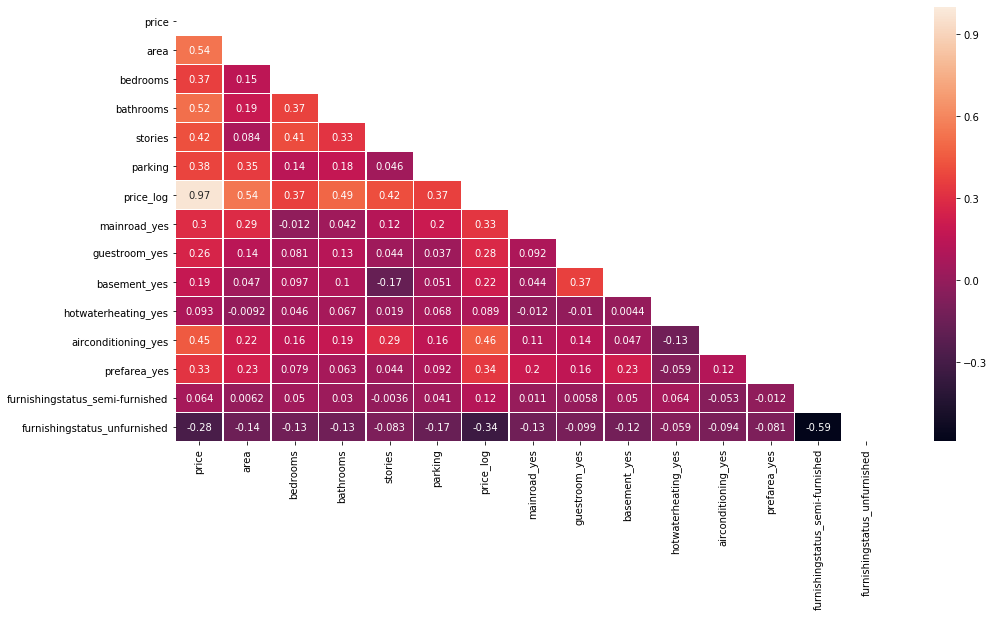

In [14]:
plt.figure(figsize = (16,8))
corr_back = df.corr()
mask = np.zeros_like(corr_back, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_back, mask = mask, annot = True, linewidth = 0.5)
plt.show()

In [15]:
#Variance inflation Factor (VIF) 
#r^2/1-r^2 = vif

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif = [vif(xc.values,i) for i in range(xc.shape[1])]

pd.DataFrame({'vif': vif}, index = xc.columns)
#Vif of dummy variables is not considered.

,vif
const,33.384521
area,1.325250
bedrooms,1.369477
bathrooms,1.286621
stories,1.478055
parking,1.212837
mainroad_yes,1.172728
guestroom_yes,1.212838
basement_yes,1.323050
hotwaterheating_yes,1.041506


In [16]:
#Since vif scores are not over 10, we will continue removing the columns based on teh Pvalue.
xc = xc.drop(['furnishingstatus_semi-furnished'], axis = 1)
model2 = sm.OLS(y,xc).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     102.8
Date:                Thu, 16 Jan 2020   Prob (F-statistic):          5.55e-130
Time:                        14:49:40   Log-Likelihood:                 92.684
No. Observations:                 545   AIC:                            -159.4
Df Residuals:                     532   BIC:                            -103.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           14.3663      0.048    299.077      0.000      14.272      14.461
area                          4.937e-05    4.7e-06     10.511      0.000    4.01e-05    5.86e-05
bedrooms                         0.0296      0.014      2.108      0.035       0.002       0.057
bathrooms                        0.1629      0.020      8.147      0.000       0.124       0.202
stories                          0.0899      0.012      7.246      0.000       0.066       0.114
parking                          0.0445      0.011      3.933      0.000       0.022       0.067
mainroad_yes                     0.1165      0.027      4.239      0.000       0.063       0.171
guestroom_yes                    0.0691      0.025      2.714      0.007       0.019       0.119
basement_yes                     0.0893      0.021      4.186      0.000       0.047       0.131
hotwaterheating_yes              0.1641      0.043      3.803      0.000       0.079       0.249
airconditioning_yes              0.1733      0.021      8.301      0.000       0.132       0.214
prefarea_yes                     0.1261      0.022      5.640      0.000       0.082       0.170
furnishingstatus_unfurnished    -0.1215      0.020     -6.211      0.000      -0.160      -0.083
==============================================================================
Omnibus:                        3.520   Durbin-Watson:                   1.302
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                3.776
Skew:                          -0.086   Prob(JB):                        0.151
Kurtosis:                       3.369   Cond. No.                     3.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Constant is insignificant. We will remove it only when you are sure, its a line passing through origin. Otherwise ignore.

##### 68% of variation in price is explained by the above variables in the model3.

Ho: barea = bbathrooms ...=0
H1: barea is not = bbathrooms ...is not =0

Since Fstatsistic is 103.1 when ploted, the value of Prob(F-stat) is very low - closer to 0. Hence its says that if Ho is true, the Fstat cannot be 103.
Hence we reject H0.

Also check as Hypothesis for each significant 
When we removed semi-furnished, it means that there is no difference in price between semi & furnished.
Also if you buy unfurnished, with the base as furnished, you will pay lesser hence the value is negative

#### Assumption - Normality of residuals

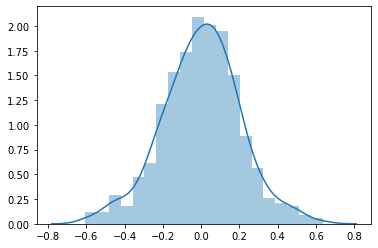

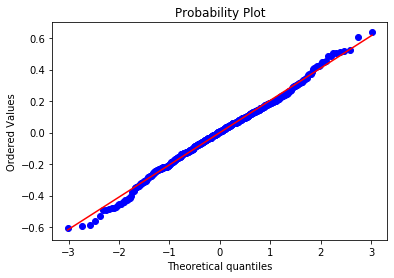

In [18]:
residuals = model2.resid
sns.distplot(residuals)
plt.show()
stats.propfbplot(residuals, plot = plt)
plt.show()

In [19]:
#Jarque Bera Test of Normality
#H0: Data is normal
#H1: Data is not normal
print(stats.jarque_bera(residuals))

(3.775631715654927, 0.15140213174991823)


##### Homoscadacity

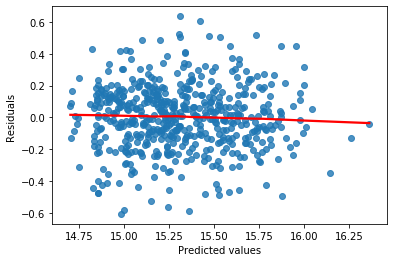

(1.0380954485771865, 0.38173634287296676, 'increasing')

In [26]:
residuals = model2.resid
y_pred = model2.predict(xc)

sns.regplot(x = y_pred, y = residuals, lowess = True, line_kws = {'color':'red'})
plt.xlabel('Predicted values')
plt.ylabel('Residuals ')
plt.show()

#H0: Residual variance is constant across the range of data. 
#H1: Residual variance is not constant across the range of data. 

import statsmodels.stats.api as sms
test = sms.het_goldfeldquandt(y = residuals, x = xc)
test

Since p s higher than alpha(0.05), we will accept the null hypothesis and conclude that Residual variance is constant.

##### Auto-correlation

C:\Users\Shweta  Sharma\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


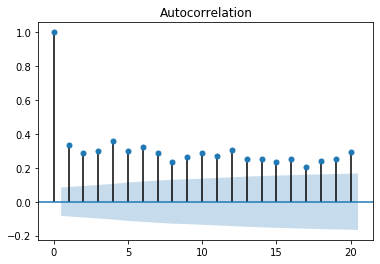

In [27]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residuals, lags = 20)
acf.show()

Durbin Watson value from the model2 is 1.302. the expected value is 2 if there is no auto-correlation. 
DW of 1.302 shows that there is slight presence of autocorrelation.

##### Linearity of relationships

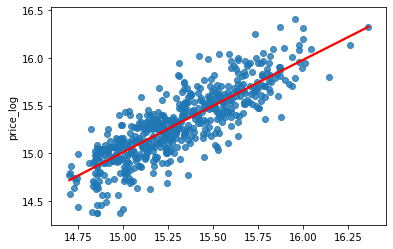

In [28]:
sns.regplot(x = y_pred, y = y, lowess = True, line_kws={'color':'red'})
plt.show()

The linear plot shows that the model2 is representative of most of the points.

##### Polynomial features - to improve performance of the model (r2 value which is currently 70%)

In [31]:
y= df.price_log
x= df.drop(['price', 'price_log'], axis = 1)

pf=sp.PolynomialFeatures()

xt=pf.fit_transform(x)
list = pf.get_feature_names(x.columns)
xt = pd.DataFrame(xt, columns = list)

xt

,1,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,...,airconditioning_yes^2,airconditioning_yes prefarea_yes,airconditioning_yes furnishingstatus_semi-furnished,airconditioning_yes furnishingstatus_unfurnished,prefarea_yes^2,prefarea_yes furnishingstatus_semi-furnished,prefarea_yes furnishingstatus_unfurnished,furnishingstatus_semi-furnished^2,furnishingstatus_semi-furnished furnishingstatus_unfurnished,furnishingstatus_unfurnished^2
0,1.0,7420.0,4.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,8960.0,4.0,4.0,4.0,3.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,9960.0,3.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,1.0,7500.0,4.0,2.0,2.0,3.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,7420.0,4.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,7500.0,3.0,3.0,1.0,2.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
6,1.0,8580.0,4.0,3.0,4.0,2.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
7,1.0,16200.0,5.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1.0,8100.0,4.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,1.0,5750.0,3.0,2.0,4.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [32]:
xt.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 105 columns):
1                                                               float64
area                                                            float64
bedrooms                                                        float64
bathrooms                                                       float64
stories                                                         float64
parking                                                         float64
mainroad_yes                                                    float64
guestroom_yes                                                   float64
basement_yes                                                    float64
hotwaterheating_yes                                             float64
airconditioning_yes                                             float64
prefarea_yes                                                    float64
furnishingstatus_semi-furnishe

In [33]:
model3 = sm.OLS(y,xt).fit()
model3.summary()

C:\Users\Shweta  Sharma\Anaconda\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Shweta  Sharma\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Shweta  Sharma\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Shweta  Sharma\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     15.57
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           2.26e-95
Time:                        15:18:03   Log-Likelihood:                 162.96
No. Observations:                 545   AIC:                            -133.9
Df Residuals:                     449   BIC:                             279.0
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
1                                                               14.2779      0.227     62.776      0.000      13.831      14.725
area                                                             0.0001   3.25e-05      3.208      0.001    4.04e-05       0.000
bedrooms                                                         0.1396      0.101      1.387      0.166      -0.058       0.337
bathrooms                                                       -0.0513      0.169     -0.304      0.761      -0.383       0.280
stories                                                          0.1095      0.105      1.044      0.297      -0.097       0.316
parking                                                          0.0027      0.085      0.032      0.975      -0.165       0.171
mainroad_yes                                                    -0.0312      0.079     -0.394      0.694      -0.187       0.124
guestroom_yes                                                    0.0893      0.095      0.940      0.348      -0.097       0.276
basement_yes                                                     0.0924      0.071      1.298      0.195      -0.047       0.232
hotwaterheating_yes                                             -0.0780      0.150     -0.519      0.604      -0.373       0.217
airconditioning_yes                                              0.1027      0.071      1.442      0.150      -0.037       0.243
prefarea_yes                                                    -0.1728      0.109     -1.583      0.114      -0.387       0.042
furnishingstatus_semi-furnished                                  0.0155      0.069      0.225      0.822      -0.120       0.151
furnishingstatus_unfurnished                                    -0.0982      0.068     -1.442      0.150      -0.232       0.036
area^2                                                       -3.783e-09   1.61e-09     -2.355      0.019   -6.94e-09   -6.26e-10
area bedrooms                                                -7.275e-06   9.28e-06     -0.784      0.433   -2.55e-05     1.1e-05
area bathrooms                                                1.605e-05   1.21e-05      1.329      0.184   -7.68e-06    3.98e-05
area stories                                                 -2.938e-06   8.97e-06     -0.328      0.743   -2.06e-05    1.47e-05
area parking                                                 -4.442e-06   6.42e-06     -0.692      0.489   -1.71e-05    8.17e-06
area mainroad_yes                                             8.119e-06   2.38e-05      0.341      0.734   -3.87e-05     5.5e-05
area guestroom_yes                                           -5.367e-05   1.89e-05     -2.839      0.005   -9.08e-05

###### Backward Elimination

In [34]:
cols = xt.columns.tolist()

while len(cols)>0:
    
    x_1 = xt[cols]
    model = sm.OLS(y,x_1).fit()
    p = pd.Series(model.pvalues.values, index=cols)
    pmax = max(p)
    feature_max_p = p.idxmax()
    
    if pmax>0.05:
        cols.remove(feature_max_p)
    else:
        break
        


In [36]:
len(cols)

28

In [35]:
model4 = sm.OLS(y,xt[cols]).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     63.93
Date:                Thu, 16 Jan 2020   Prob (F-statistic):          2.07e-135
Time:                        15:21:18   Log-Likelihood:                 131.25
No. Observations:                 545   AIC:                            -214.5
Df Residuals:                     521   BIC:                            -111.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
1                                                               14.5645      0.050    290.973      0.000      14.466      14.663
area                                                          9.647e-05   1.67e-05      5.786      0.000    6.37e-05       0.000
basement_yes                                                     0.0558      0.012      4.482      0.000       0.031       0.080
airconditioning_yes                                              0.0925      0.013      7.017      0.000       0.067       0.118
furnishingstatus_unfurnished                                    -0.1485      0.026     -5.658      0.000      -0.200      -0.097
area^2                                                       -4.525e-09   1.12e-09     -4.051      0.000   -6.72e-09   -2.33e-09
area bathrooms                                                1.435e-05   3.84e-06      3.738      0.000    6.81e-06    2.19e-05
area guestroom_yes                                           -2.089e-05   8.04e-06     -2.597      0.010   -3.67e-05   -5.08e-06
area furnishingstatus_semi-furnished                         -1.414e-05   6.51e-06     -2.174      0.030   -2.69e-05   -1.36e-06
bedrooms parking                                                 0.0241      0.010      2.488      0.013       0.005       0.043
bedrooms mainroad_yes                                            0.0277      0.008      3.403      0.001       0.012       0.044
bedrooms hotwaterheating_yes                                     0.0746      0.015      4.846      0.000       0.044       0.105
bathrooms furnishingstatus_semi-furnished                        0.0742      0.026      2.846      0.005       0.023       0.125
bathrooms furnishingstatus_unfurnished                           0.1516      0.040      3.777      0.000       0.073       0.230
stories^2                                                        0.0176      0.003      6.852      0.000       0.013       0.023
parking^2                                                       -0.0480      0.014     -3.417      0.001      -0.076      -0.020
parking mainroad_yes                                             0.0709      0.035      2.021      0.044       0.002       0.140
mainroad_yes prefarea_yes                                        0.1612      0.025      6.568      0.000       0.113       0.209
guestroom_yes basement_yes                                       0.1744      0.049      3.529      0.000       0.077       0.271
guestroom_yes airconditioning_yes                                0.1577      0.050      3.179      0.002       0.060       0.255
guestroom_yes prefarea_yes                                      -0.1031      0.050     -2.070      0.039      -0.201

### Train-Test split - model4

In [38]:
xt_train,xt_test,y_train,y_test = train_test_split(xt[cols], y, test_size=0.30, random_state=1)

print(xt_train , y_train)
print(xt_test, y_test)

       1     area  basement_yes  airconditioning_yes  \
180  1.0   4500.0           1.0                  1.0   
189  1.0   3540.0           1.0                  0.0   
93   1.0   7200.0           1.0                  1.0   
444  1.0   3120.0           0.0                  0.0   
81   1.0   4000.0           1.0                  1.0   
345  1.0   2015.0           1.0                  0.0   
314  1.0   4040.0           0.0                  0.0   
115  1.0   8000.0           1.0                  1.0   
286  1.0   2787.0           1.0                  0.0   
400  1.0   3512.0           0.0                  0.0   
221  1.0   3420.0           0.0                  0.0   
432  1.0   6060.0           1.0                  0.0   
270  1.0   4500.0           0.0                  0.0   
139  1.0   6360.0           1.0                  1.0   
106  1.0   5450.0           1.0                  1.0   
257  1.0   8250.0           0.0                  0.0   
329  1.0   3960.0           0.0                 

       1     area  basement_yes  airconditioning_yes  \
62   1.0   6240.0           0.0                  1.0   
247  1.0   8400.0           0.0                  0.0   
142  1.0  10500.0           0.0                  0.0   
107  1.0   6420.0           1.0                  0.0   
483  1.0   6615.0           0.0                  0.0   
351  1.0   3600.0           0.0                  0.0   
516  1.0   3240.0           0.0                  0.0   
47   1.0   6600.0           0.0                  1.0   
481  1.0   2700.0           0.0                  0.0   
90   1.0   5000.0           0.0                  1.0   
492  1.0   2650.0           1.0                  0.0   
429  1.0   4775.0           0.0                  0.0   
133  1.0   4800.0           0.0                  1.0   
117  1.0   3700.0           0.0                  1.0   
67   1.0   7700.0           0.0                  0.0   
0    1.0   7420.0           0.0                  1.0   
370  1.0   4280.0           0.0                 

In [40]:
model5 = sm.OLS(y_train, xt_train).fit()
y_train_pred = model4.predict(xt_train)
y_test_pred = model4.predict(xt_test)
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     45.16
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           4.84e-91
Time:                        15:29:15   Log-Likelihood:                 105.29
No. Observations:                 381   AIC:                            -162.6
Df Residuals:                     357   BIC:                            -67.95
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
1                                                               14.5559      0.058    250.363      0.000      14.442      14.670
area                                                           9.44e-05   1.86e-05      5.062      0.000    5.77e-05       0.000
basement_yes                                                     0.0719      0.015      4.900      0.000       0.043       0.101
airconditioning_yes                                              0.0690      0.015      4.459      0.000       0.039       0.099
furnishingstatus_unfurnished                                    -0.1491      0.032     -4.658      0.000      -0.212      -0.086
area^2                                                       -4.694e-09   1.22e-09     -3.851      0.000   -7.09e-09    -2.3e-09
area bathrooms                                                1.654e-05   4.38e-06      3.776      0.000    7.93e-06    2.52e-05
area guestroom_yes                                           -2.313e-05   8.89e-06     -2.603      0.010   -4.06e-05   -5.65e-06
area furnishingstatus_semi-furnished                         -9.305e-06    7.3e-06     -1.274      0.203   -2.37e-05    5.05e-06
bedrooms parking                                                 0.0165      0.011      1.527      0.128      -0.005       0.038
bedrooms mainroad_yes                                            0.0275      0.009      2.900      0.004       0.009       0.046
bedrooms hotwaterheating_yes                                     0.0810      0.018      4.527      0.000       0.046       0.116
bathrooms furnishingstatus_semi-furnished                        0.0585      0.029      2.001      0.046       0.001       0.116
bathrooms furnishingstatus_unfurnished                           0.1608      0.049      3.290      0.001       0.065       0.257
stories^2                                                        0.0206      0.003      6.768      0.000       0.015       0.027
parking^2                                                       -0.0489      0.017     -2.884      0.004      -0.082      -0.016
parking mainroad_yes                                             0.1002      0.040      2.493      0.013       0.021       0.179
mainroad_yes prefarea_yes                                        0.1432      0.029      5.012      0.000       0.087       0.199
guestroom_yes basement_yes                                       0.1883      0.058      3.249      0.001       0.074       0.302
guestroom_yes airconditioning_yes                                0.1843      0.060      3.094      0.002       0.067       0.301
guestroom_yes prefarea_yes                                      -0.1261      0.060     -2.111      0.035      -0.243

In [42]:
from sklearn.metrics import r2_score, mean_squared_error

y_train_pred = model5.predict(xt_train)

print('R-square of Train data: ',r2_score(y_train, y_train_pred))

print('RMSE of Train data: ',np.sqrt(mean_squared_error(y_train, y_train_pred)))

y_test_pred = model5.predict(xt_test)
print('\n')
print('R-square of Test data: ',r2_score(y_test, y_test_pred))

print('RMSE of Test data: ',np.sqrt(mean_squared_error(y_test, y_test_pred)))

R-square of Train data:  0.744190710449917
RMSE of Train data:  0.18354732233417803


R-square of Test data:  0.7109538255111159
RMSE of Test data:  0.21045298993976716


# Model Building using Machine Learning

In [44]:
y = df['price_log']
x = df.drop(['price', 'price_log'], axis = 1)

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=1)

lr = LinearRegression()

lr.fit(x_train, y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
final = pd.DataFrame()


R-square of Train data:  0.7036861890139565
RMSE of Train data:  0.19754491022596338


R-square of Test data:  0.6690328794181719
RMSE of Test data:  0.22519768052107086


### Applying RFE to select the optimum number of Features

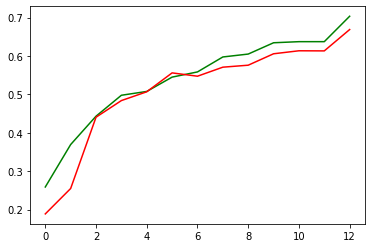

In [45]:
lr = LinearRegression(fit_intercept=True)
rfe = RFE(lr, n_features_to_select = 2)
rfe.fit(x, y)

no_cols = x.shape[1]
nvars = []

r2_train_score = []
r2_test_score = []

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=1)

for n in range(no_cols):
    lr = LinearRegression()
    rfe = RFE(lr, n+1)
    nvars.append(n+1)
    rfe.fit(x_train, y_train)
    y_train_pred = rfe.predict(x_train)
    y_test_pred = rfe.predict(x_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_train_score.append(r2_train)
    r2_test = r2_score(y_test, y_test_pred)
    r2_test_score.append(r2_test)
    
    
plt.plot(r2_train_score, color = 'g')
plt.plot(r2_test_score, color = 'r')
plt.show()

In [47]:
train_result = pd.DataFrame({'nvars':nvars, 'r2_test': r2_train_score})
train_result.sort_values(by = ['r2_test'], ascending = False)

,nvars,r2_test
12,13,0.703686
11,12,0.637461
10,11,0.637444
9,10,0.634592
8,9,0.605149
7,8,0.597576
6,7,0.558621
5,6,0.545088
4,5,0.507754
3,4,0.497812


In [46]:
test_result = pd.DataFrame({'nvars':nvars, 'r2_test': r2_test_score})
test_result.sort_values(by = ['r2_test'], ascending = False)

,nvars,r2_test
12,13,0.669033
10,11,0.613706
11,12,0.613398
9,10,0.605898
8,9,0.576135
7,8,0.570964
5,6,0.556108
6,7,0.547449
4,5,0.506854
3,4,0.483958


### Illustration of  Cross Validation & K Fold

In [53]:
#To get list of all the metrics that can be used in cross_val_score
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [54]:
lr = LinearRegression()
scores = cross_val_score(lr, x, y, cv = 3, scoring = 'neg_mean_squared_error')
print(scores)
print(scores.mean())

[-0.15217875 -0.04188722 -0.12382292]
-0.10596296160453289


In [59]:
#If we want to do a random_state, its not possible in Cross validation. Hence use KFold.
#It can also be used as an iterator

lr = LinearRegression()
kf = KFold(n_splits = 3, random_state = 4, shuffle = True)
scores = cross_val_score(lr, x, y, cv=kf, scoring = 'neg_mean_squared_error')
print(scores)
print(scores.mean())

[-0.04560141 -0.04338724 -0.04671696]
-0.045235204374846134


# Regularlization

### Lasso Regularlization - L1

In [73]:
lasso = Lasso(alpha = 1e-10)
lasso.fit(x,y)
pd.DataFrame(lasso.coef_, x.columns, columns = ['coefs'])

,coefs
area,0.000049
bedrooms,0.029472
bathrooms,0.163204
stories,0.090131
parking,0.044772
mainroad_yes,0.117473
guestroom_yes,0.069789
basement_yes,0.089313
hotwaterheating_yes,0.163424
airconditioning_yes,0.174807


In [76]:
n_alphas = 5
alphas = np.logspace(0,1 , n_alphas)

lasso_cv = LassoCV(alphas = alphas, cv = 3, random_state = 1)
lasso_cv.fit(x, y)

print(lasso_cv.alpha_)

1.0


In [74]:
#Lasso doesnt seem to be a good approach for this data. Henc we try ridge.

### Ridge Regression

In [75]:
n_alpha = 100
alphas = np.logspace(-2,3, n_alpha)
ridge = RidgeCV(alphas=alphas, cv = 3)

ridge.fit(x,y)

ridge.alpha_

C:\Users\Shweta  Sharma\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.01